# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 20 баллов





-----

In [1]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

#### *Профиль биология*

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [3]:
data = pd.read_csv('breast_cancer_disbalances.csv')
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [4]:
data.info()  # Кажется, что пропусков нет или их одинаковое колличество

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              10683 non-null  int64
 1   Uniformity of Cell Size      10683 non-null  int64
 2   Uniformity of Cell Shape     10683 non-null  int64
 3   Marginal Adhesion            10683 non-null  int64
 4   Single Epithelial Cell Size  10683 non-null  int64
 5   Bare Nuclei                  10683 non-null  int64
 6   Bland Chromatin              10683 non-null  int64
 7   Normal Nucleoli              10683 non-null  int64
 8   Mitoses                      10683 non-null  int64
 9   Class                        10683 non-null  int64
dtypes: int64(10)
memory usage: 834.7 KB


In [5]:
data.isna().sum()  # Убеждаемся, что их точно нет

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

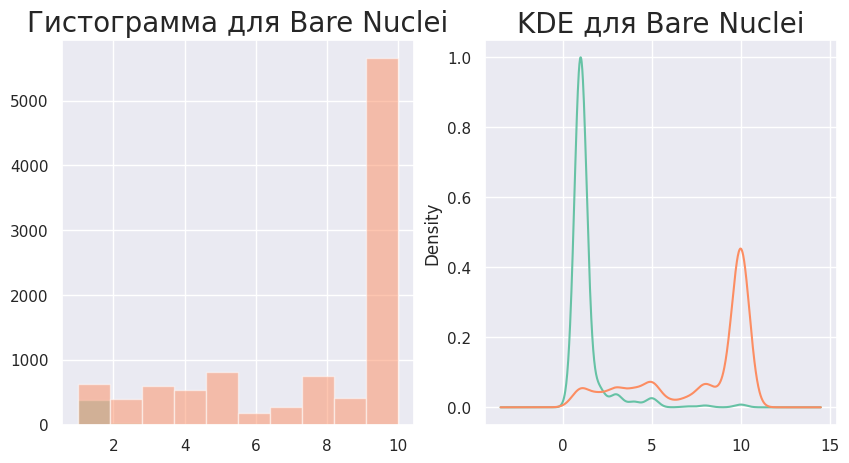

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** Ядерная оценка плотности показывает общий тренд распределения, сглаживает данные и показывает как меняется вероятность в зависимости от значения переменной. Гистограмма же помогает сравнивать переменные между разными категориями. Из наших данных видно, что больше всего значений class - это 2, а наибольшее колличество Bare Nuclei - 10

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

In [7]:
# traits = list(data.columns.values)
# count_traits = len(traits)
# traits = traits[0:count_traits-1]
# count_traits -= 1

# fig, axs = plt.subplots(len(traits), 2, figsize=(16, 25))

# for i, column in enumerate(traits):
#     data.groupby("Class")[column].hist(ax=axs[i, 0], alpha=0.5)
#     data.groupby("Class")[column].plot(kind='kde', ax=axs[i, 1])
#     axs[i, 0].set_title(f'Гистограмма для {column}', fontsize=10)
#     axs[i, 1].set_title(f'KDE для {column}', fontsize=10)
# traits

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** <...>

**Это не конец задачи! Переходите к пункту 2!**

#### *Профиль физика*

Загрузите данные по бинарной классификации астероидов в зависимости от различных параметров с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data). Можно заметить, что наш датасет сильно меньше по размерам, чем оригинал. Это сделано намеренно.

In [8]:
data = pd.read_csv('asteroid_cut.csv')
data.head(10)

,pha,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,Y,0.674,0.246,0.014,2459000.5,59000,20200531.0,45.866197,150.740973,322.105952,...,4.207900e-08,0.000016,0.000005,0.000023,0.000053,1.150700e-08,1.472100e-08,0.000056,0.000006,0.29264
1,N,3.784,0.039,0.043,2459000.5,59000,20200531.0,15.888281,158.041201,111.859817,...,1.562300e-07,0.000006,0.000024,0.000030,0.000014,2.680900e-08,2.477700e-09,0.000064,0.000019,0.59991
2,N,8.119,0.035,0.416,2459000.5,59000,20200531.0,15.026047,203.726362,124.436743,...,1.254500e-07,0.000006,0.000016,0.000025,0.000019,2.160200e-08,1.782500e-09,0.000097,0.000018,0.52034
3,N,1.961,0.264,0.356,2459000.5,59000,20200531.0,1.851420,133.373581,280.521600,...,1.048100e-07,0.000004,0.000139,0.000140,0.000014,1.265800e-08,1.737100e-09,0.000055,0.000009,0.58595
4,N,6.652,0.048,0.172,2459000.5,59000,20200531.0,3.687808,91.553962,305.870014,...,8.995300e-08,0.000004,0.000065,0.000067,0.000016,1.134000e-08,1.541100e-09,0.000060,0.000008,0.52223
5,N,4.380,0.113,0.025,2459000.5,59000,20200531.0,13.582454,134.725837,265.821635,...,9.951100e-08,0.000004,0.000017,0.000020,0.000014,1.716300e-08,1.982000e-09,0.000062,0.000013,0.50852
6,N,8.253,0.065,0.482,2459000.5,59000,20200531.0,16.815002,356.685082,96.010492,...,1.311600e-07,0.000006,0.000016,0.000024,0.000016,2.565200e-08,1.743800e-09,0.000090,0.000021,0.51157
7,N,2.720,0.035,0.526,2459000.5,59000,20200531.0,4.260832,333.808876,4.814064,...,2.291900e-07,0.000009,0.000098,0.000688,0.000680,2.867700e-08,3.446700e-09,0.003101,0.000026,0.58623
8,N,11.940,0.059,0.248,2459000.5,59000,20200531.0,9.198414,74.807955,324.765579,...,1.232900e-07,0.000004,0.000030,0.000032,0.000011,1.732000e-08,1.616600e-09,0.000052,0.000013,0.49955
9,Y,0.369,0.471,0.081,2459000.5,59000,20200531.0,21.844707,177.601716,295.852797,...,9.103300e-08,0.000015,0.000052,0.000048,0.000087,1.671700e-08,2.518200e-08,0.000078,0.000007,0.44885


In [9]:
data.info()
data.isna().sum()  # Проверяем на наличие пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pha             951 non-null    object 
 1   diameter        951 non-null    float64
 2   albedo          951 non-null    float64
 3   diameter_sigma  951 non-null    float64
 4   epoch           951 non-null    float64
 5   epoch_mjd       951 non-null    int64  
 6   epoch_cal       951 non-null    float64
 7   i               951 non-null    float64
 8   om              951 non-null    float64
 9   w               951 non-null    float64
 10  ma              951 non-null    float64
 11  ad              951 non-null    float64
 12  tp              951 non-null    float64
 13  tp_cal          951 non-null    float64
 14  sigma_e         951 non-null    float64
 15  sigma_a         951 non-null    float64
 16  sigma_q         951 non-null    float64
 17  sigma_i         951 non-null    flo

pha               0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
i                 0
om                0
w                 0
ma                0
ad                0
tp                0
tp_cal            0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
rms               0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `rms` для разных классов:

Text(0.5, 1.0, 'KDE для rms')

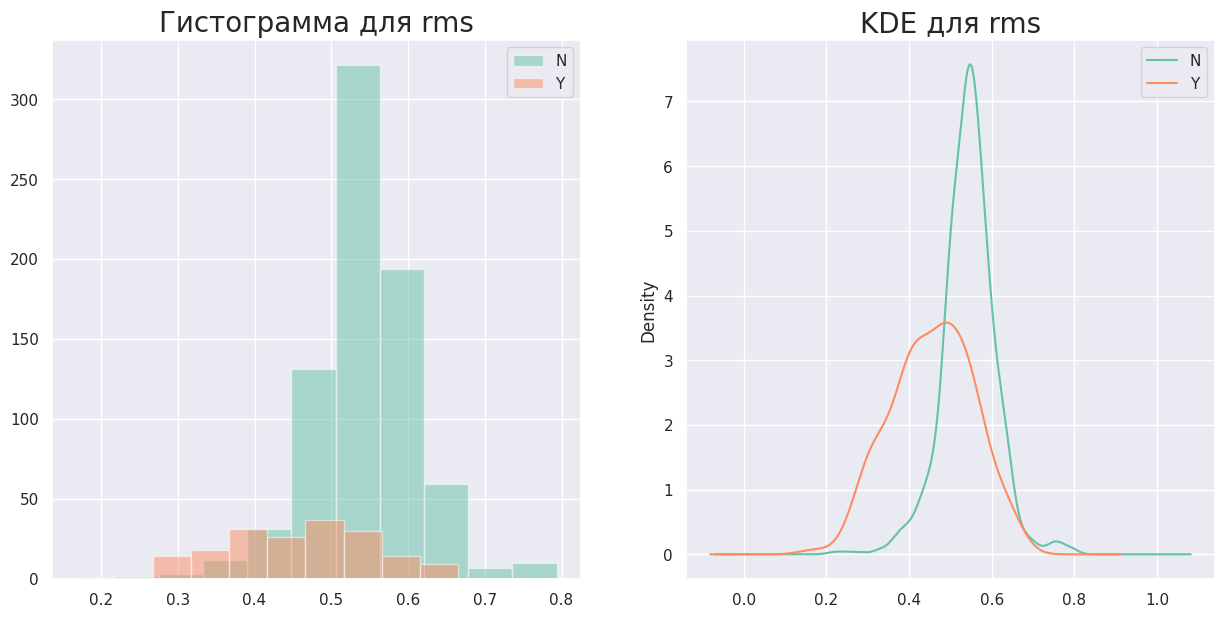

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['rms'].hist(ax=axs[0], alpha=0.5, legend=True)
data.groupby("pha")['rms'].plot(kind='kde', ax=axs[1], legend=True)
axs[0].set_title('Гистограмма для rms', fontsize=20)
axs[1].set_title('KDE для rms', fontsize=20)

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** Признак rms мы разделяем на 2 (группируем по признаку pha). Судя по KDE, распределения похожи на нормальные. однако те данные, у которых признак pha имеет значение Y, более разбросаны и их значительно меньше, в то время как данные имеющие pha = Y имеют небольшой разброс и большее колличество экземпляров.

Постройте гистограммы и ядерные оценки плотности для указанных ниже признаков отдельно для каждого класса. `pha` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

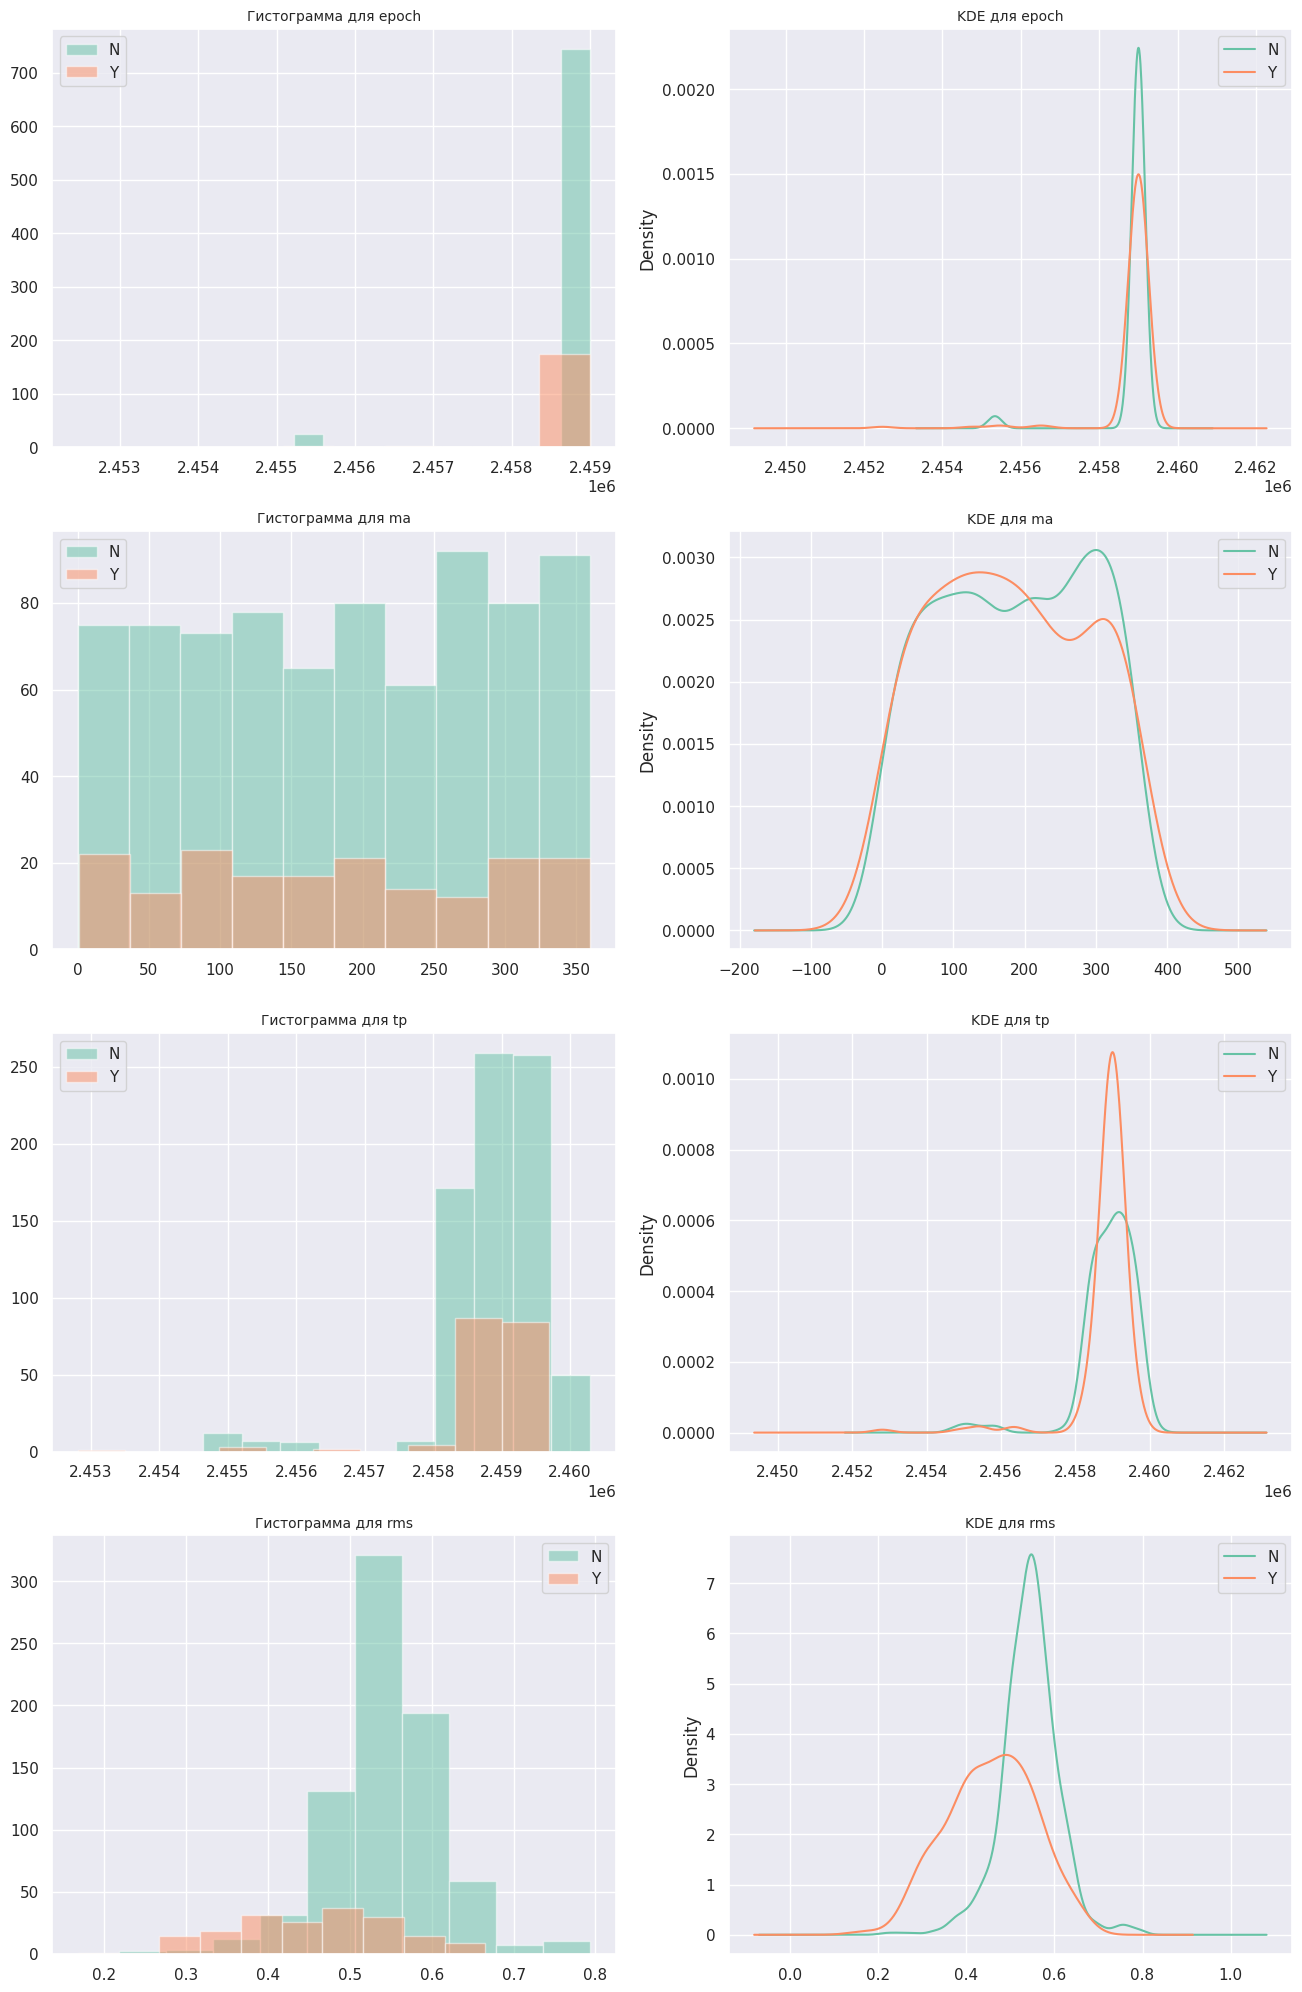

In [11]:
features = ['epoch', 'ma', 'tp', 'rms']

fig, axs = plt.subplots(len(features), 2, figsize=(16, 25))

for i, column in enumerate(features):
    data.groupby("pha")[column].hist(ax=axs[i, 0], alpha=0.5, legend=True)
    data.groupby("pha")[column].plot(kind='kde', ax=axs[i, 1], legend=True)
    axs[i, 0].set_title(f'Гистограмма для {column}', fontsize=10)
    axs[i, 1].set_title(f'KDE для {column}', fontsize=10)

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** Сразу бросается в глаза, что признак epoch может иметь выбросы (у группы N). У двух групп признака ma распределение напоминает равномерное. Все остальные распределения похожи на нормальные. Также видно, что признаки сильно перекрываются для N и для Y. Это может сказаться на результатах.

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [12]:
X = np.hstack([data.drop('pha', axis=1)])
y = data['pha']
X_train, X_test = train_test_split(X, test_size=0.3, train_size=0.7, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.3, train_size=0.7, random_state=207)

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Объясните, что делает `StandardScaler` и почему его нельзя обучать на тестовой выборке?

**Ответ:**  StarndartScaler предоставляет возможность нормировать выборки, то есть для каждого значения признака он выччитает из него среднее значение и делит на среднеквадратичное отклонение. Таким образом, признаки имеют распределение со средним = 0 и дисперсией = 1. Нельзя применять метод fit для тестовой выборки, чтобы модель ничего не знала о тестовых данных.

Обучите модель логистической регрессии.

In [14]:
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания, рассмотрите метрики: `accuracy_score`, `precision` и `recall`.

Если названия ваших классов отличаются от 0 и 1, то надо использовать аргумент `pos_label`.

In [15]:
y_pred = model.predict(X_test)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(
    "accuracy: ",
    accuracy_score(y_true=y_test, y_pred=y_pred),
    "\nprecision: ",
    precision_score(y_true=y_test, y_pred=y_pred, pos_label="Y"),
    "\nrecall: ",
    recall_score(y_true=y_test, y_pred=y_pred, pos_label="Y")
    )

accuracy:  0.9545454545454546 
precision:  0.925 
recall:  0.7872340425531915


Можем ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими. 

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

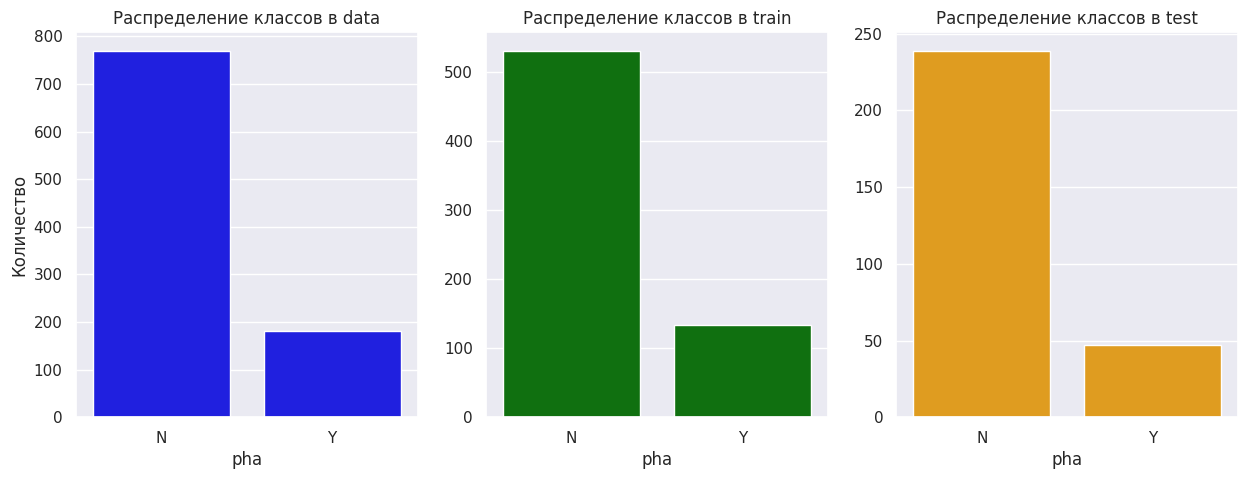

In [16]:
original = data['pha'].value_counts() # Колонка таргета из изначального датасета
train = y_train.value_counts() # Колонка таргета из тренировочного датасета
test = y_test.value_counts() # Колонка таргета из тестового датасета

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=['blue'])
axes[0].set_title('Распределение классов в data')
axes[0].set_ylabel('Количество')

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=['orange'])
axes[2].set_title('Распределение классов в test')

plt.show()

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:** 

У нас есть перекос в сторону одного класса, следовательно наша модель будет пытаться предсказывать его чаще. У нас примерно 80% экземпляров класса “N” и 20% экземпляров класса “Y”, модель склоняется к предсказанию “N” для всех измерений, даже если это не очень оправдано.
Также модель могла недообучиться из-за недостаточного колличества примеров этого класса. В будующем это может привести к недостаточно точным предсказаниям для редкого [Y] класса. 


Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия &mdash; для взвешенной логистической регресси будет записана как:

$$
L(y, \widehat{y}) = \sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$

где:


- $ y_i $ - истинный класс для образца  $i$
- $ \widehat{y}_i $ - предсказанный класс для образца $i$
- $ w_{y_i} $ - вес класса



Давайте реализуем этот метод. Допишите код и в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

In [17]:
threshold = 0.8
class_weights = {"N": threshold, "Y": 1 - threshold}
# если использовать class_weights = 'balanced', модель сама подсчитает веса

weighted_model = LogisticRegression(class_weight=class_weights)

Посчитайте метрики качества. `Accuracy` посчитайте двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html). 

In [18]:
y_pred = model.predict(X_test)

print(
    "Не взвешенная - \n",
    "accuracy: ",
    accuracy_score(y_true=y_test, y_pred=y_pred),
    "\nprecision: ",
    precision_score(y_true=y_test, y_pred=y_pred, pos_label="Y"),
    "\nrecall: ",
    recall_score(y_true=y_test, y_pred=y_pred, pos_label="Y")
    )

weighted_model.fit(X_train, y_train)
y_pred = weighted_model.predict(X_test)

print(
    "Взвешенная -\n",
    "accuracy: ",
    accuracy_score(y_true=y_test, y_pred=y_pred),
    "\nprecision: ",
    precision_score(y_true=y_test, y_pred=y_pred, pos_label="Y"),
    "\nrecall: ",
    recall_score(y_true=y_test, y_pred=y_pred, pos_label="Y")
    )

Не взвешенная - 
 accuracy:  0.9545454545454546 
precision:  0.925 
recall:  0.7872340425531915
Взвешенная -
 accuracy:  0.9125874125874126 
precision:  0.9583333333333334 
recall:  0.48936170212765956


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

**Вывод:** Взвешенная модель стала работать хуже, чем обычная модель обученная по несбалансированной выборке. Учитывать несбалансированность - нужно, потому что на произвольных данных невзвешенная модель должна показывать себя хуже.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; `Lasso`, `Ridge`, `Elastic Net`.  

При выполнении задания воспользуйтесь готовыми реализациями методов в `sklearn`. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [19]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """
    Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """
    
    alphas = np.logspace(log_min, log_max, num) # сетка параметров   
    coefs = [] # коэффициенты моделей
    for a in alphas:
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(10, 5)):
    
    """
    Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num) # сетка параметров  

    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
        ind += 1
        
    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### *Профиль физика*

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице в сжатом виде, которые действуют как молекулярные признаки. 0-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа. Этот столбец возьмем в качестве индекса строк. Последний столбец `Eat` — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso. Этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*.

In [20]:
data = pd.read_csv('physics_data.csv', index_col=0)
data.head(503)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Eat
pubchem_id,,,,,,,,,,,,,,,,,,,,,
25004,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.028997,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,-19.013763
25005,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.006840,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,-10.161019
25006,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.004305,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,-9.376619
25009,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,0.028996,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,-13.776438
25011,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.004552,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27535,-92.990624,-37.989869,-41.713767,2.459257,-18.563966,12.633696,10.269036,7.093498,11.729846,-0.500295,...,-0.001426,-0.000781,-0.002851,-0.006694,-0.001080,0.003278,0.011115,0.005822,0.005368,-9.593441
27536,-33.853515,35.368724,13.274417,25.765836,16.590896,-13.918333,16.788150,-14.716585,3.238425,-12.302618,...,-0.013100,-0.003979,0.009309,0.003323,-0.009299,0.000988,-0.010954,-0.003540,-0.001859,-11.076878
27538,-38.655242,11.967915,-12.953299,12.041033,26.324118,4.377067,-5.507208,-15.101374,-4.403972,13.578827,...,-0.001100,-0.008269,-0.003215,0.005450,0.003140,-0.000292,0.001727,0.014564,0.009907,-9.005514


Разделите данные на признаки $X$ и целевые переменные $y$. **Для дальнейших заданий оставьте 20 признаков.**

In [21]:
X = np.hstack([data.drop("Eat", axis=1)])
y = data["Eat"]

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

reg_model = Lasso(alpha=0.01) 

reg_model.fit(X, y)

sfm = SelectFromModel(reg_model, max_features=20)
X_selected = sfm.transform(X)


X_selected


array([[ 5.34050587,  0.00640321,  5.7274834 , ...,  0.22941084,
        -0.16735142,  0.38187346],
       [-0.66409134, -0.14325974,  0.25251429, ..., -0.11839371,
         0.07696647,  0.0519379 ],
       [ 1.05843498, -1.04730987, -2.32035278, ...,  0.11023872,
         0.07663445,  0.07595659],
       ...,
       [-5.08114117, -0.19248146, -0.0932752 , ...,  0.12737966,
        -0.40291029, -0.05397317],
       [-3.14035855, -0.25588028,  0.40952935, ..., -0.42889271,
         0.36640432, -0.14332783],
       [ 5.30294036,  1.83854573,  0.76498194, ...,  0.62853301,
        -0.07628355,  0.19850403]])

Разделите выборку в отношении 7:3. Далее везде, вплоть до сравнения моделей, используйте обучающую выборку.

In [22]:
X_train, X_test = train_test_split(X_selected, test_size=0.3, train_size=0.7, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.3, train_size=0.7, random_state=207)

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку. 


#### 2. Влияние регуляризации на коэффициенты моделей

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

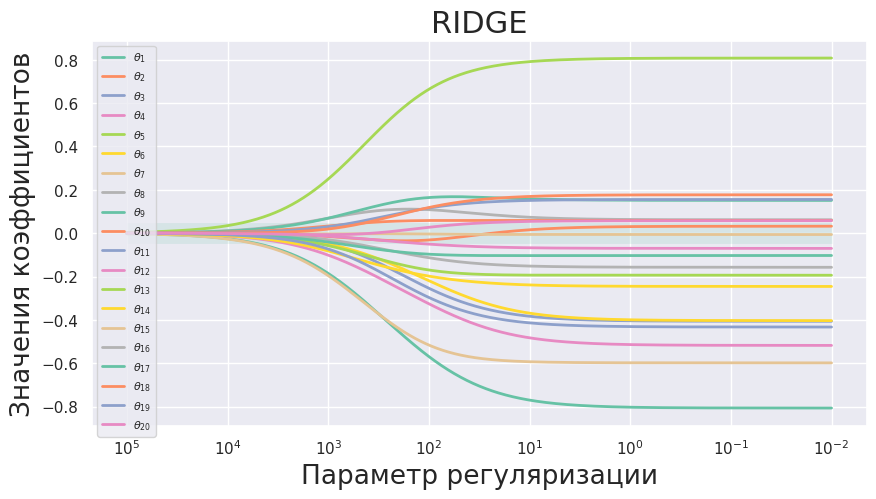

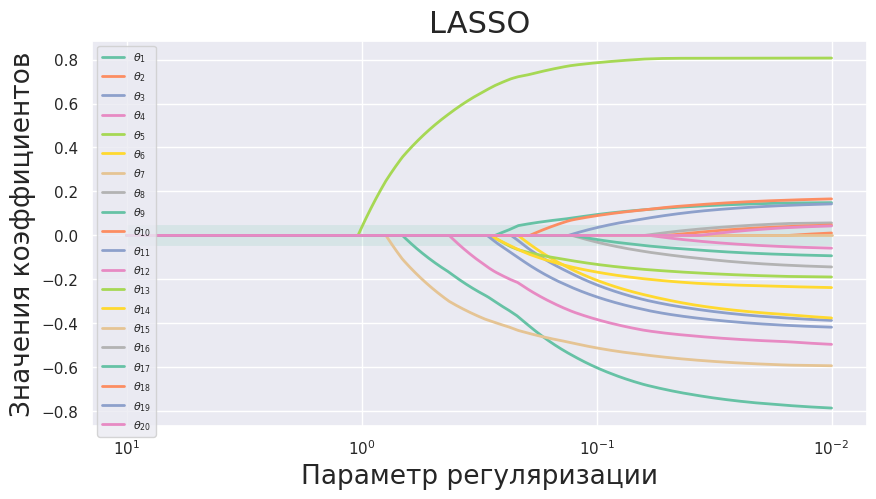

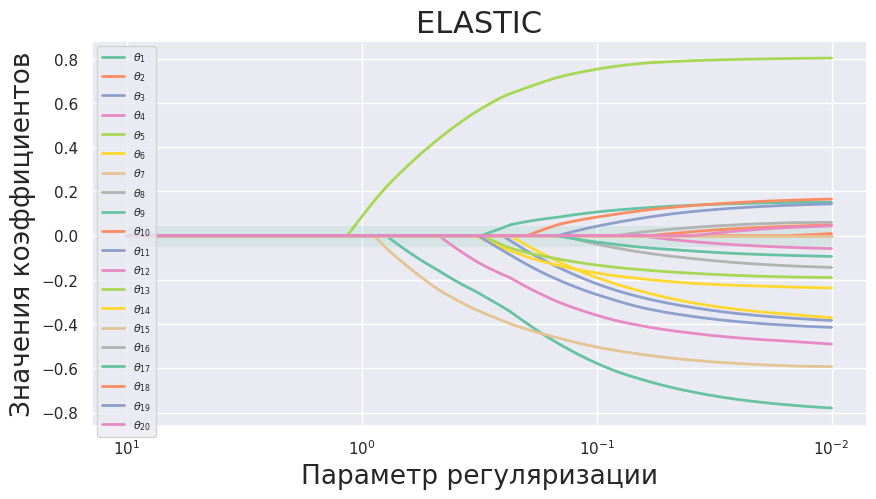

In [24]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge(
    alpha=1.0,
    fit_intercept=True,
    )

# коэффициенты регрессии
log_min, log_max, num = -2, 5, 1000
ridge_coefs = calculate_coef(ridge_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(ridge_coefs, log_min, log_max, num, "RIDGE")


# Lasso регрессия
lasso_model = Lasso(
    alpha=1.0,
    fit_intercept=True,
    max_iter=1000,
    tol=0.0001,
    precompute=True
    )

log_min, log_max, num = -2, 1, 1000
lasso_coefs = calculate_coef(lasso_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(lasso_coefs, log_min, log_max, num, "LASSO")

# Elastic регрессия
elastic_model = ElasticNet(
    alpha=0.01, 
    l1_ratio=0.6,  # установите какое-то значение l1_ratio
    fit_intercept=True, 
    max_iter=5000,
    tol=0.0001, 
    precompute=True)  

log_min, log_max, num = -2, 1, 1000
elastic_coefs = calculate_coef(elastic_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(elastic_coefs, log_min, log_max, num, "ELASTIC")

**Ответ:** Значения стоит искать в диапозоне от 0.01 до нескольких десятков у lasso и elastic net (больше нет смысла, так как все коэффициенты занулятся), у ridge стоит охватить больше значений (в нашем случае сильно больше до 10e5), это связано с тем, что Ridge не обнуляет коэффициенты, а лишь накладывает на них штраф. Эти цифры, конечно, ориентировочные и могут зависеть от входных данных.

Посмотрите, как выглядят графики без стандартизации. Почему так происходит?

In [25]:
X_train, X_test = train_test_split(X_selected, test_size=0.3, train_size=0.7, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.3, train_size=0.7, random_state=207)

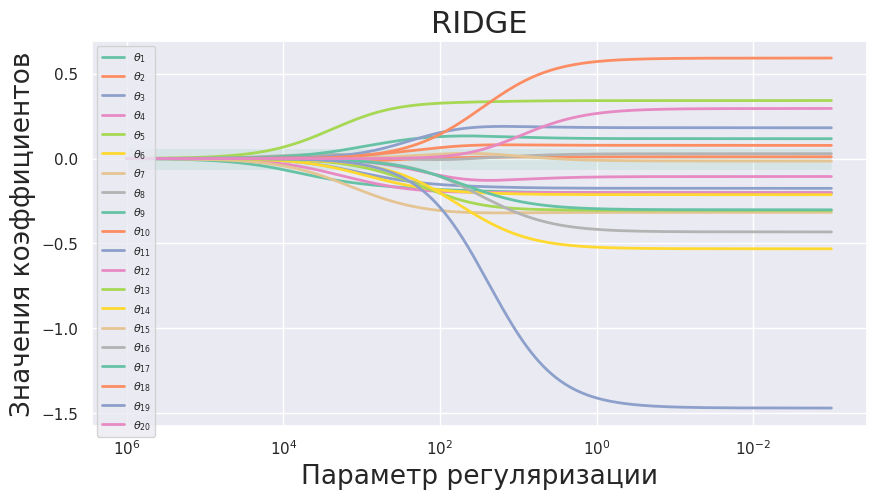

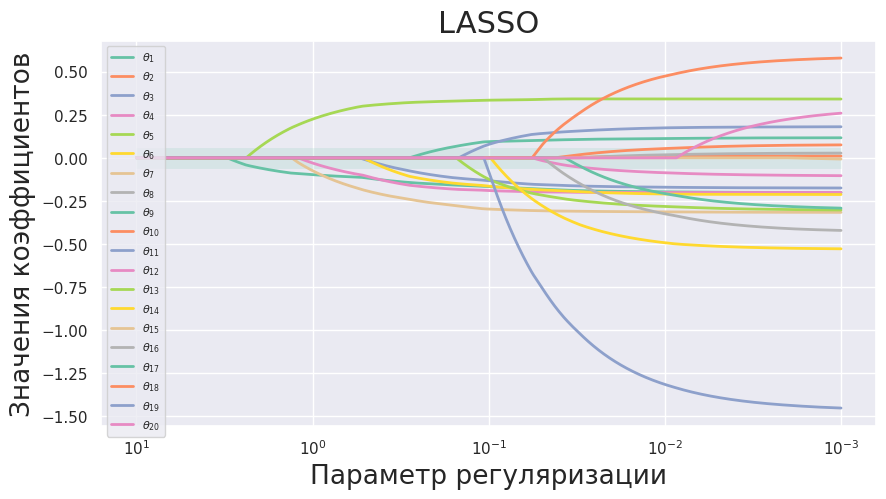

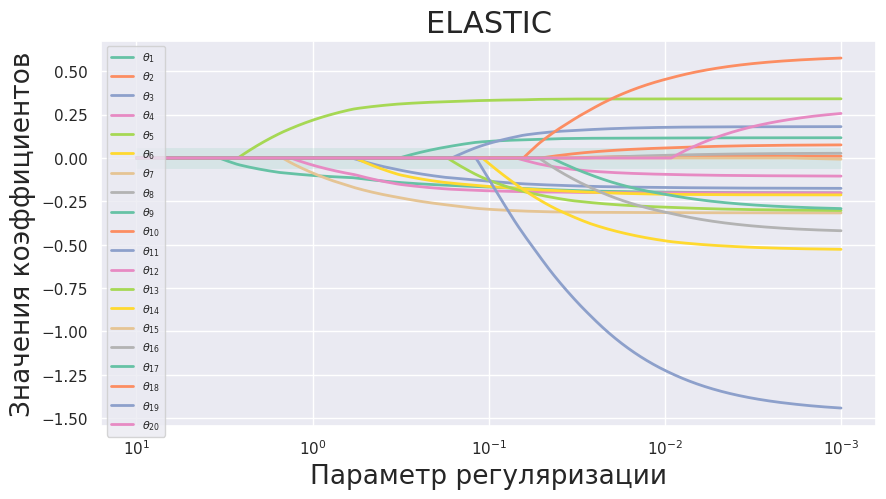

In [26]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge(
    alpha=1.0,
    fit_intercept=True,
    )

# коэффициенты регрессии
log_min, log_max, num = -3, 6, 1000
ridge_coefs = calculate_coef(ridge_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(ridge_coefs, log_min, log_max, num, "RIDGE")


# Lasso регрессия
lasso_model = Lasso(
    alpha=1.0,
    fit_intercept=True,
    max_iter=1000,
    tol=0.0001,
    precompute=True
    )

log_min, log_max, num = -3, 1, 1000
lasso_coefs = calculate_coef(lasso_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(lasso_coefs, log_min, log_max, num, "LASSO")

# Elastic регрессия
elastic_model = ElasticNet(
    alpha=0.01, 
    l1_ratio=0.6,  # установите какое-то значение l1_ratio
    fit_intercept=True, 
    max_iter=5000,
    tol=0.0001, 
    precompute=True)  

log_min, log_max, num = -3, 1, 1000
elastic_coefs = calculate_coef(elastic_model, X_train, y_train, log_min, log_max, num)

# отрисовка

draw_track(elastic_coefs, log_min, log_max, num, "ELASTIC")

**Ответ:** Коэффициенты стали более хаотичными и диапазон параметра регуляции увеличился. Это связано с тем, что данные не отнормированны

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

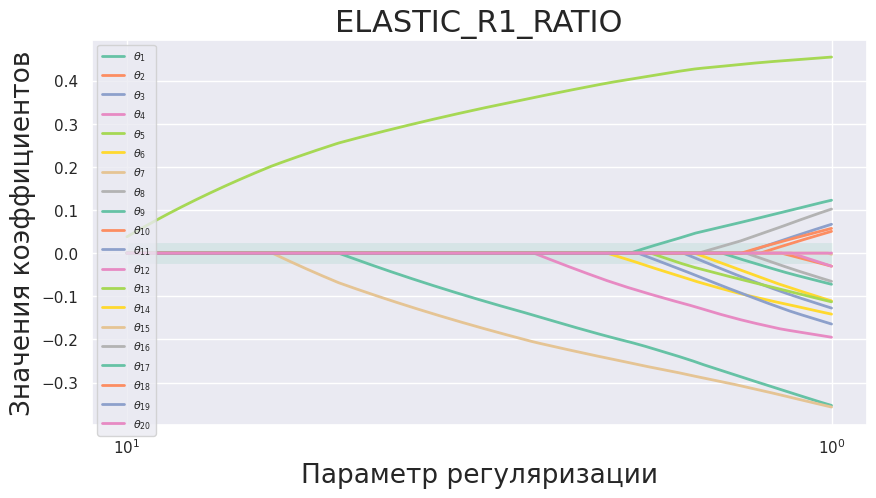

In [27]:
def calculate_coefs(model, X, y, min, max, 
               num):
    """
    Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """
    
    l1_ratios = np.linspace(min, max, num) 
    coefs = []
    for l1_ratio in l1_ratios:
        model.set_params(l1_ratio=l1_ratio)
        model.fit(X, y)
        coefs.append(model.coef_[:20]) 
    return coefs


# Нормируем
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Выбираем диапазоны
min, max, num = 0, 1, 1000

model = ElasticNet( alpha=1, 
    fit_intercept=True, 
    max_iter=5000,
    tol=0.0001, 
    precompute=True)

coefs = calculate_coefs(model, X_train, y_train, min, max, num)

draw_track(coefs, min, max, num, "ELASTIC_R1_RATIO")

Координата x на самом деле изменяется линейно в диапазоне [0,1] (т.е. смотря на 10^0.5, нужно предсталять что у нас значение 0.5)

**Вывод:** Если зафиксировать alpha = 1, то параметр r1_ration при своем увеличении, устремляет все коэффициенты к 0 (так же себя ведет lasso)


**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

***Физика:*** Для этого задания возьмите полный датасет &mdash; все 300 признаков.

In [28]:
data = pd.read_csv('physics_data.csv', index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Eat
pubchem_id,,,,,,,,,,,,,,,,,,,,,
25004,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.028997,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,-19.013763
25005,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.006840,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,-10.161019
25006,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.004305,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,-9.376619
25009,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,0.028996,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,-13.776438
25011,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.004552,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,-8.537140


In [29]:
X = np.hstack([data.drop("Eat", axis=1)])
y = data["Eat"]

X_train, X_test = train_test_split(X, test_size=0.3, train_size=0.7, random_state=207)
y_train, y_test = train_test_split(y, test_size=0.3, train_size=0.7, random_state=207)

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [30]:
linreg = {}

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)

linreg['MSE'] = mean_squared_error(y_true=y_test, y_pred=y_pred)
linreg['MAE'] = mean_absolute_error(y_true=y_test, y_pred=y_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)

print(linreg)

{'MSE': 372.72237512831924, 'MAE': 3.366684099848089, 'MAPE': 0.2514076246017838}


Допишите функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [31]:
def draw_errors(error, error_name, alphas, X_train, y_train, X_test, y_test):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = []
        for alpha in alphas:
            models.append(Ridge(alpha=a))
            models.append(Lasso(alpha=a))
            for r1 in [0.1, 0.5, 0.9]:
                models.append(ElasticNet(alpha=a, l1_ratio=r1))
        for model in models:
            # обучение модели и предсказание
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ["RIDGE", "LASSO", "ELASTIC(r1_ratio=0.1)", "ELASTIC(r1_ratio=0.5)", "ELASTIC(r1_ratio=0.9)"]
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha


    linreg = {}

    linreg_model = LinearRegression()
    linreg_model.fit(X_train, y_train)
    y_pred = linreg_model.predict(X_test)

    linreg[error_name] = error(y_true=y_test, y_pred=y_pred)

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [32]:
alphas = np.logspace(-6, 8, 20)

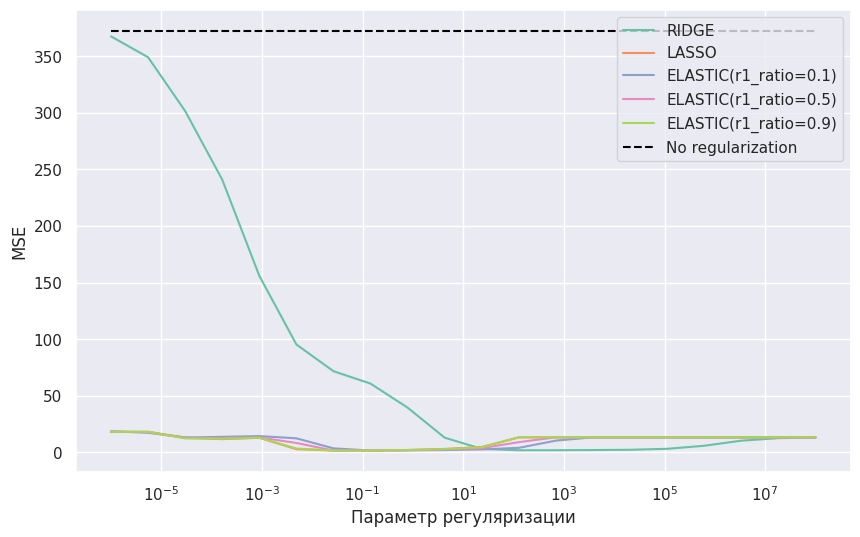

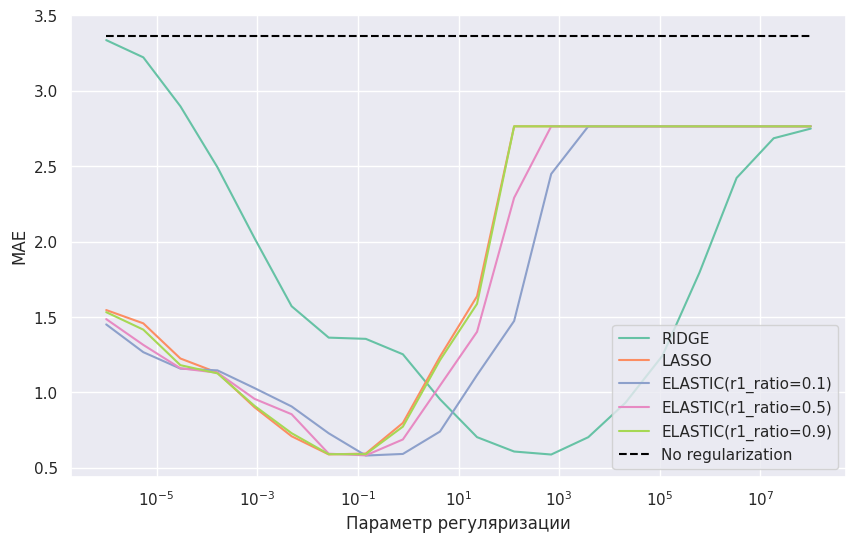

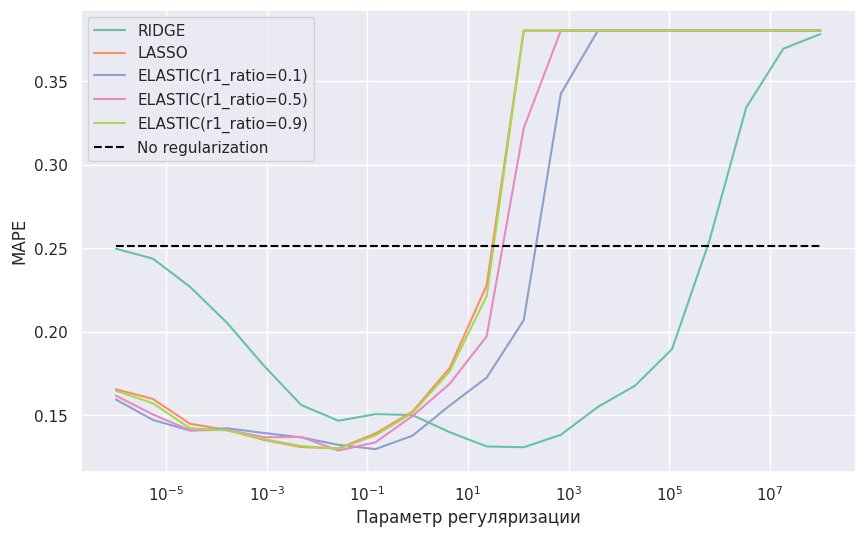

In [33]:
# вложите в функции метрики
draw_errors(mean_squared_error, "MSE", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_error, "MAE", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

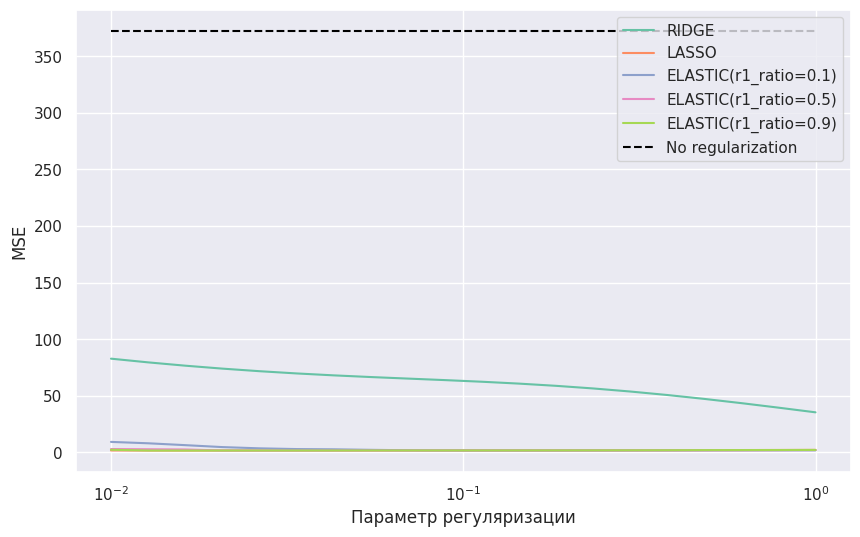

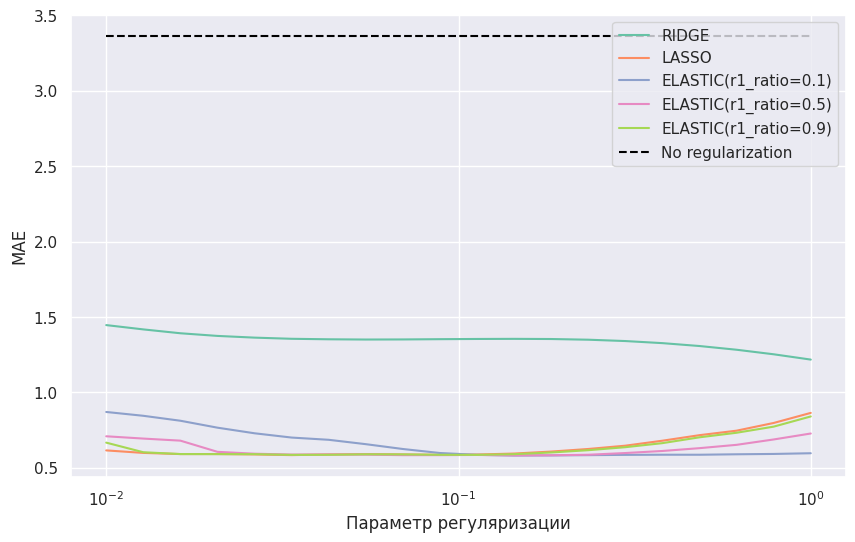

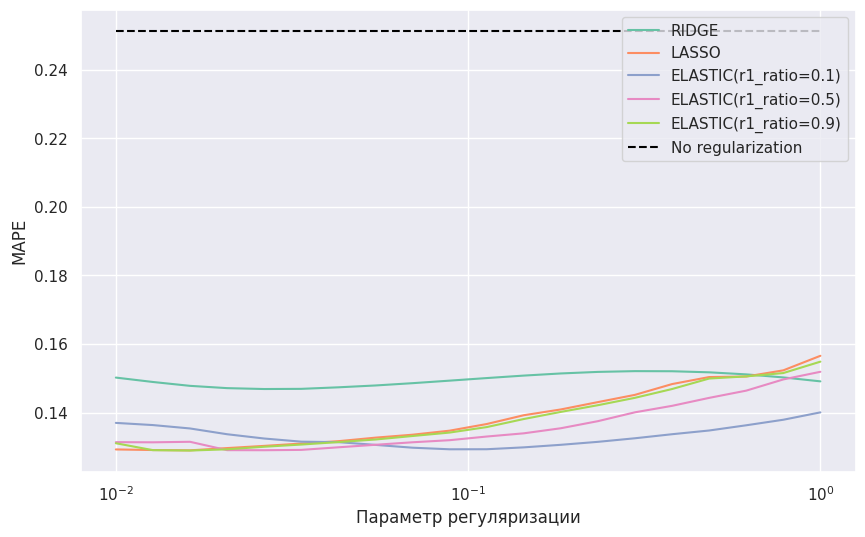

In [34]:
alphas = np.logspace(-2, 0, 20)

draw_errors(mean_squared_error, "MSE", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_error, "MAE", alphas, X_train, y_train, X_test, y_test)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas, X_train, y_train, X_test, y_test)

**3.** Сделайте общий вывод по задаче. 

Укажите: в чем разница между `L1` и `L2` регуляризациями, как реализуется регуляризация в `ElasticNet`, что такое `l1-ratio` и зачем нужен, как это видно в наших графиках. (Своими словами)

**Вывод:** при alpha лежащем в области [0.01, 1] модели предсказывают лучше всего. Хуже всего, если это можно так назвать, предсказывает Ridge, lasso и elastic практически не отличимы, разве что можно заметить, что elastic(r1_ratio->1) совпадает с lasso. Также заметим, что все модели при alpha -> 0 должны стремиться к обычной линейной регрессии, предпосылки к этому мы можем увидеть на первых трех графиках(ridge так вообще, почти приблизилась к пунктирной линии). При большом параметре регуляризации все коэффициенты зануляются и получается обычная оценка средним (точность сразу ухудшается, это видно, например на MAPE)

L1 регуляризация - это Lasso, она использует первую норму для столбца тетта; задача минимизации решается только итеративными методами, она зануляет коэффициенты с ростом параметра (т.е. она убирает ненужные признаки).
L2 регуляризация - это Ridge, она использует вторую норму для столбца тетта; она ограничивает коэффициенты, не позволяя им колебаться.
ElasticNet сочетает в себе признаки как Lasso, так и Ridge. У нее есть параметр r1_ratio, который как бы регулирует соотношение между L1 и L2 (при r1_ratio = 0 - Ridge, при r1_ratio = 1 - Lasso). ElasticNet помогает отбирать признаки и уменьшать влияния коррелированных признаков, т.е. что-то среднее между lasso и ridge.

## Задача 4


Регуляризацию успользуют не только в задачах регрессии, но и в задачах классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция *правдоподобия*, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Мы получили логистическую регрессию c **$l_2$-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому такого понятия как "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение*,согласно выбранной метрике.

Выведите формулу поиска оценки коэффициентов методом *градиентного подъёма* и *стохастического градиентного подъёма* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией